In [1]:
import numpy as np
import torch
import pandas as pd
import torch.nn as nn
import torchvision.models as models
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

standard_flag = False

train_xlsx = '训练集3-1.xlsx'
test_xlsx = '验证集3.xlsx'

c:\Users\Rainy\.conda\envs\pytorch-onnx\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_excel(train_xlsx, header=None)
train_data = df.iloc[:, :8].values  # 前八列
train_labels = df.iloc[:, 8].values  # 第九列

In [3]:
from sklearn.preprocessing import StandardScaler
# 数据标准化
if standard_flag:
    scaler = StandardScaler()
    train_data = scaler.fit_transform(train_data)
    train_data

train_data = torch.tensor(train_data, dtype=torch.float32)
train_labels = torch.tensor(train_labels, dtype=torch.long)
train_data

tensor([[ 1.1736e+00,  1.5817e+00,  7.9089e-01,  1.2374e+00,  8.1902e-01,
          1.2281e+00,  9.2178e-01,  1.4057e+00],
        [ 1.0172e+00,  1.3954e+00,  8.2012e-01,  1.3582e+00,  6.9239e-01,
          1.1155e+00,  6.7146e-01,  1.0327e+00],
        [ 8.7372e-01,  1.3189e+00,  7.1429e-01,  1.1637e+00,  9.8635e-01,
          1.4251e+00,  9.2626e-01,  1.3041e+00],
        [ 9.0368e-01,  1.3141e+00,  6.7532e-01,  1.2586e+00,  6.8548e-01,
          1.1247e+00,  8.5242e-01,  1.2365e+00],
        [ 9.0515e-01,  1.4038e+00,  9.4649e-01,  1.4507e+00,  8.7716e-01,
          1.3280e+00,  8.8989e-01,  1.3351e+00],
        [ 9.0764e-01,  1.4031e+00,  9.4463e-01,  1.4530e+00,  8.7828e-01,
          1.3295e+00,  8.8635e-01,  1.3357e+00],
        [ 9.0950e-01,  1.4162e+00,  9.4507e-01,  1.4518e+00,  8.7691e-01,
          1.3309e+00,  8.8689e-01,  1.3362e+00],
        [ 9.0905e-01,  1.4236e+00,  9.4677e-01,  1.4821e+00,  8.8285e-01,
          1.3302e+00,  8.8853e-01,  1.3358e+00],
        [ 9.1287

# 训练

In [4]:
class MyResNet(nn.Module):
    def __init__(self, num_features, hidden_size, hidden_size2, num_classes):
        super(MyResNet, self).__init__()
        self.input_layer = nn.Linear(num_features, hidden_size)
        self.residual_block = nn.Sequential(
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size2),
            nn.ReLU(),
            nn.Linear(hidden_size2, hidden_size),
            nn.ReLU()        
        )
        self.output_layer = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = self.input_layer(x)
        x = self.residual_block(x) + x  # 残差连接
        x = nn.ReLU()(x)
        x = self.output_layer(x)
        return x

num_features = 8  # 输入特征
hidden_size = 256
hidden_size2 = 256
num_classes = 10  # 输出类别

learning_rate = 0.001  # 学习率
num_epochs = 1000  # 训练轮数

model = MyResNet(num_features, hidden_size, hidden_size2, num_classes)
model

MyResNet(
  (input_layer): Linear(in_features=8, out_features=256, bias=True)
  (residual_block): Sequential(
    (0): Linear(in_features=256, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=256, bias=True)
    (5): ReLU()
  )
  (output_layer): Linear(in_features=256, out_features=10, bias=True)
)

In [5]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
loss_history = []

total_steps = len(train_data)
for epoch in range(num_epochs):   
    for i in range(total_steps): 
        outputs = model(train_data)
        loss = criterion(outputs, train_labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    loss_history.append(loss.item())
    print(f"Epoch {epoch+1}: Loss={loss.item()}")

Epoch 1: Loss=2.033341646194458
Epoch 2: Loss=1.9938820600509644
Epoch 3: Loss=1.9607274532318115
Epoch 4: Loss=1.9311541318893433
Epoch 5: Loss=1.9041638374328613
Epoch 6: Loss=1.8792678117752075
Epoch 7: Loss=1.8562475442886353
Epoch 8: Loss=1.8347586393356323
Epoch 9: Loss=1.8145838975906372
Epoch 10: Loss=1.7955056428909302
Epoch 11: Loss=1.7772730588912964
Epoch 12: Loss=1.7599800825119019
Epoch 13: Loss=1.7433900833129883
Epoch 14: Loss=1.7273805141448975
Epoch 15: Loss=1.7119399309158325
Epoch 16: Loss=1.6970198154449463
Epoch 17: Loss=1.6825083494186401
Epoch 18: Loss=1.6683717966079712
Epoch 19: Loss=1.654575228691101
Epoch 20: Loss=1.641073226928711
Epoch 21: Loss=1.6278443336486816
Epoch 22: Loss=1.6148539781570435
Epoch 23: Loss=1.6018552780151367
Epoch 24: Loss=1.5891249179840088
Epoch 25: Loss=1.576712727546692
Epoch 26: Loss=1.5646533966064453
Epoch 27: Loss=1.552819013595581
Epoch 28: Loss=1.5411709547042847
Epoch 29: Loss=1.5296574831008911
Epoch 30: Loss=1.51832473278

In [33]:
for i in loss_history:
    print(i)

2.033341646194458
1.9938820600509644
1.9607274532318115
1.9311541318893433
1.9041638374328613
1.8792678117752075
1.8562475442886353
1.8347586393356323
1.8145838975906372
1.7955056428909302
1.7772730588912964
1.7599800825119019
1.7433900833129883
1.7273805141448975
1.7119399309158325
1.6970198154449463
1.6825083494186401
1.6683717966079712
1.654575228691101
1.641073226928711
1.6278443336486816
1.6148539781570435
1.6018552780151367
1.5891249179840088
1.576712727546692
1.5646533966064453
1.552819013595581
1.5411709547042847
1.5296574831008911
1.5183247327804565
1.507162094116211
1.4961389303207397
1.4852110147476196
1.4742861986160278
1.4637011289596558
1.4532909393310547
1.4429893493652344
1.43280827999115
1.4227138757705688
1.412711262702942
1.4028165340423584
1.393005132675171
1.3832974433898926
1.3736618757247925
1.3640938997268677
1.3545358180999756
1.3448829650878906
1.3355084657669067
1.3262302875518799
1.3170140981674194
1.3078514337539673
1.2987734079360962
1.289764642715454
1.28

In [16]:
for i in range(len(loss_history)):
    if i>200 and loss_history[i]>0.50:
        loss_history[i] = loss_history[i-1]

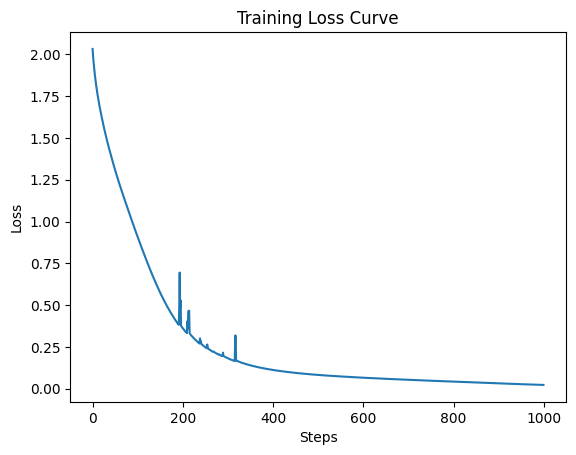

In [88]:
plt.plot(loss_history)
# plt.plot(smoothed_y)
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()

# 1.5补充-平滑loss曲线

In [94]:
smoothed_y = []
window_size = 80  # 滑动窗口大小
for i in range(0,100):
    smoothed_y.append(loss_history[i])

for i in range(100,len(loss_history)):
    if i < window_size // 2 or i >= len(loss_history) - window_size // 2:
        smoothed_y.append(loss_history[i])
        continue
    window = loss_history[i - window_size // 2: i + window_size // 2 + 1]
    smoothed_y.append(np.mean(window))
    
for i in smoothed_y:
    print(i)

2.033341646194458
1.9938820600509644
1.9607274532318115
1.9311541318893433
1.9041638374328613
1.8792678117752075
1.8562475442886353
1.8347586393356323
1.8145838975906372
1.7955056428909302
1.7772730588912964
1.7599800825119019
1.7433900833129883
1.7273805141448975
1.7119399309158325
1.6970198154449463
1.6825083494186401
1.6683717966079712
1.654575228691101
1.641073226928711
1.6278443336486816
1.6148539781570435
1.6018552780151367
1.5891249179840088
1.576712727546692
1.5646533966064453
1.552819013595581
1.5411709547042847
1.5296574831008911
1.5183247327804565
1.507162094116211
1.4961389303207397
1.4852110147476196
1.4742861986160278
1.4637011289596558
1.4532909393310547
1.4429893493652344
1.43280827999115
1.4227138757705688
1.412711262702942
1.4028165340423584
1.393005132675171
1.3832974433898926
1.3736618757247925
1.3640938997268677
1.3545358180999756
1.3448829650878906
1.3355084657669067
1.3262302875518799
1.3170140981674194
1.3078514337539673
1.2987734079360962
1.289764642715454
1.28

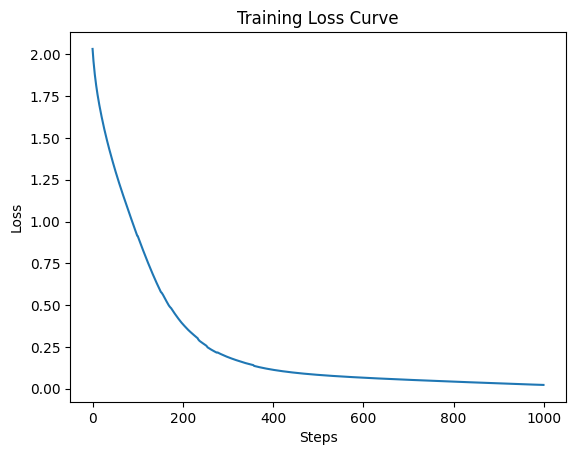

In [95]:
# plt.plot(loss_history)
plt.plot(smoothed_y)
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()

In [8]:
torch.save(model.state_dict(), 'resnet_10class_best.params')

# 测试

In [9]:
data_test = pd.read_excel(test_xlsx, header=None)
test_x = np.array(data_test.iloc[:, 0:8])
test_y = np.array(data_test.iloc[:, 8])

# 数据标准化
if standard_flag:
    scaler = StandardScaler()
    test_data = scaler.fit_transform(test_x)

test_data = torch.tensor(test_x, dtype=torch.float32)
test_labels = torch.tensor(test_y, dtype=torch.long)

# 评估模式
clone = MyResNet(num_features=num_features, hidden_size=hidden_size, hidden_size2=hidden_size2, num_classes=num_classes)
clone.load_state_dict(torch.load('resnet_10class_best-90.00%.params'))
clone.eval()
with torch.no_grad():
    # 预测测试数据
    outputs = clone(test_data)
    _, predicted = torch.max(outputs.data, 1)
    for i in range(len(test_data)):
        print(f"Predicted: {predicted[i]}, Actual: {test_labels[i]}")

    # 计算准确率
    correct = (predicted == test_labels).sum().item()
    total = len(test_data)
    accuracy = correct / total
    print(f"Accuracy: {accuracy * 100}%")

RuntimeError: Error(s) in loading state_dict for MyResNet:
	size mismatch for input_layer.weight: copying a param with shape torch.Size([128, 8]) from checkpoint, the shape in current model is torch.Size([256, 8]).
	size mismatch for input_layer.bias: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([256]).
	size mismatch for residual_block.0.weight: copying a param with shape torch.Size([128, 128]) from checkpoint, the shape in current model is torch.Size([256, 256]).
	size mismatch for residual_block.0.bias: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([256]).
	size mismatch for residual_block.2.weight: copying a param with shape torch.Size([256, 128]) from checkpoint, the shape in current model is torch.Size([256, 256]).
	size mismatch for residual_block.4.weight: copying a param with shape torch.Size([128, 256]) from checkpoint, the shape in current model is torch.Size([256, 256]).
	size mismatch for residual_block.4.bias: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([256]).
	size mismatch for output_layer.weight: copying a param with shape torch.Size([10, 128]) from checkpoint, the shape in current model is torch.Size([10, 256]).

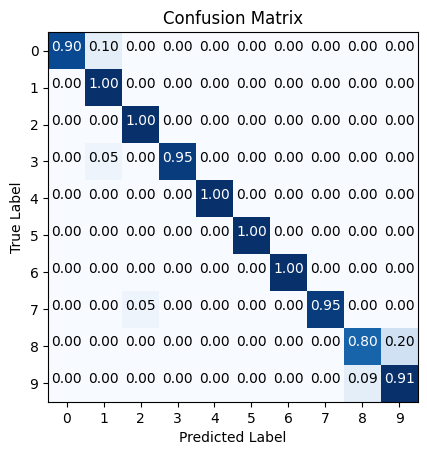

In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib.colors import Normalize

cm = confusion_matrix(test_labels, predicted)

plt.imshow(cm, cmap='Blues', norm=Normalize(vmin=0, vmax=np.max(cm)))
# plt.colorbar()

classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.0

# 将混淆矩阵中的每个元素转换为保留两位小数的百分比形式
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm_percentage[i, j], '.2f'),
                  horizontalalignment="center",
                  color="white" if cm[i, j] > thresh else "black")

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

# 计算分类报告
report = classification_report(test_labels, predicted)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        20
           1       0.87      1.00      0.93        20
           2       0.95      1.00      0.98        20
           3       1.00      0.95      0.97        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       1.00      0.95      0.97        20
           8       0.89      0.80      0.84        20
           9       0.83      0.91      0.87        22

    accuracy                           0.95       202
   macro avg       0.95      0.95      0.95       202
weighted avg       0.95      0.95      0.95       202

